In [4]:
import pandas as pd

# 주식형 펀드 파일 불러오기
fund_df = pd.read_excel('./excel/주식형펀드/미래에셋3억만들기솔로몬증권투자신탁1호(주식)_가격변동추이_20220728.xls')
fund_df.head(5)

,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,벤치마크지수,벤치마크지수.1,벤치마크지수.2,벤치마크지수.3,벤치마크지수.4
0,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,KOSPI,KOSPI200,KOSDAQ,국공채(3년만기),회사채(3년만기)
1,2022/07/01,983.32,-16.58,1014.15,83953,2305.42,304.02,729.48,3.439,4.691
2,2022/06/30,999.9,-18,1014.14,84373,2332.64,307.2,745.44,3.552,4.794
3,2022/06/29,1017.9,10.85,1011.44,84396,2377.99,312.66,762.35,3.552,4.793
4,2022/06/28,1007.05,15.74,1011.44,84403,2422.09,319.11,769.51,3.552,4.793


In [5]:
# 필요한 컬럼만 남긴다
# 기준일자, 기준가격, 전일대비\n등락, 벤치마크지수
fund_df = fund_df[["기준일자", "기준가격", "벤치마크지수"]]
fund_df.head()

,기준일자,기준가격,벤치마크지수
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [6]:
# 컬럼명 변경
fund_df.rename(columns={"벤치마크지수" : "KOSPI"}, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [7]:
# 불필요 행 제거
fund_df = fund_df.loc[1:]
fund_df.head()

,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09
5,2022/06/27,991.31,2401.92


In [8]:
# 기준일자 오름차순으로 변경
fund_df.sort_values("기준일자", ascending=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
765,2019/06/03,895.87,2067.85
764,2019/06/04,904.98,2066.97
763,2019/06/05,903.08,2069.11
762,2019/06/07,906.01,2072.33
761,2019/06/10,909.27,2099.49


In [9]:
# 인덱스 재설정
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,2019/06/03,895.87,2067.85
1,2019/06/04,904.98,2066.97
2,2019/06/05,903.08,2069.11
3,2019/06/07,906.01,2072.33
4,2019/06/10,909.27,2099.49


In [10]:
# 기준월 컬럼 생성
fund_df["기준일자"] = fund_df["기준일자"].str.replace("/", "")
fund_df["기준월"] = fund_df["기준일자"].astype(str).str[:6]
fund_df.head()

,기준일자,기준가격,KOSPI,기준월
0,20190603,895.87,2067.85,201906
1,20190604,904.98,2066.97,201906
2,20190605,903.08,2069.11,201906
3,20190607,906.01,2072.33,201906
4,20190610,909.27,2099.49,201906


In [11]:
# 일별수익률 컬럼 생성 및 계산
fund_df["일별수익률"] = fund_df["기준가격"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190603,895.87,2067.85,201906,NaN
1,20190604,904.98,2066.97,201906,0.010169
2,20190605,903.08,2069.11,201906,-0.002099
3,20190607,906.01,2072.33,201906,0.003244
4,20190610,909.27,2099.49,201906,0.003598


In [12]:
# KOSPI 일별수익률 컬럼 생성 및 계산
fund_df["KOSPI 일별수익률"] = fund_df["KOSPI"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190603,895.87,2067.85,201906,NaN,NaN
1,20190604,904.98,2066.97,201906,0.010169,-0.000426
2,20190605,903.08,2069.11,201906,-0.002099,0.001035
3,20190607,906.01,2072.33,201906,0.003244,0.001556
4,20190610,909.27,2099.49,201906,0.003598,0.013106


In [13]:
# 결측치 제거
fund_df.dropna(inplace=True)
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190604,904.98,2066.97,201906,0.010169,-0.000426
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
2,20190607,906.01,2072.33,201906,0.003244,0.001556
3,20190610,909.27,2099.49,201906,0.003598,0.013106
4,20190611,918.61,2111.82,201906,0.010272,0.005873


In [14]:
fund_df.tail()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
759,20220627,991.31,2401.92,202206,0.022180,0.014924
760,20220628,1007.05,2422.09,202206,0.015878,0.008397
761,20220629,1017.9,2377.99,202206,0.010774,-0.018207
762,20220630,999.9,2332.64,202206,-0.017683,-0.019071
763,20220701,983.32,2305.42,202207,-0.016582,-0.011669


In [15]:
fund_df[fund_df["기준일자"]=="20190701"]

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
18,20190701,927.48,2129.74,201907,-0.000496,-0.000413


In [16]:
return_3yr = (fund_df["기준가격"].loc[762] - fund_df["기준가격"].loc[18])/fund_df["기준가격"].loc[18] 
return_3yr

0.07808254625436663

In [17]:
kospi_return_3yr = (fund_df["KOSPI"].loc[762] - fund_df["KOSPI"].loc[18])/fund_df["KOSPI"].loc[18] 
kospi_return_3yr

0.09526984514541686

In [18]:
fund_df = fund_df[fund_df["일별수익률"]<0]
fund_df

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
6,20190613,920.02,2103.15,201906,-0.001042,-0.002656
7,20190614,916.73,2095.41,201906,-0.003576,-0.003680
8,20190617,913.7,2090.73,201906,-0.003305,-0.002233
9,20190618,909.45,2098.71,201906,-0.004651,0.003817
...,...,...,...,...,...,...
755,20220621,1011.65,2408.93,202206,-0.017930,0.007486
757,20220623,985.85,2325.4,202206,-0.031439,-0.007431
758,20220624,969.8,2366.6,202206,-0.016280,0.017717
762,20220630,999.9,2332.64,202206,-0.017683,-0.019071


In [19]:
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190605,903.08,2069.11,201906,-0.002099,0.001035
1,20190613,920.02,2103.15,201906,-0.001042,-0.002656
2,20190614,916.73,2095.41,201906,-0.003576,-0.003680
3,20190617,913.7,2090.73,201906,-0.003305,-0.002233
4,20190618,909.45,2098.71,201906,-0.004651,0.003817


In [20]:
# 수익률 표준편차
monthly_std = fund_df.groupby(["기준월"])["일별수익률"].std(ddof=0)
monthly_std = pd.DataFrame(monthly_std)
monthly_std

,일별수익률
기준월,
201906,0.001338
201907,0.005926
201908,0.007033
201909,0.005787
201910,0.004924
201911,0.003749
201912,0.003778
202001,0.009754
202002,0.009020


In [21]:
# KOSPI 수익률 표준편차
kospi_monthly_std = fund_df.groupby(["기준월"])["KOSPI 일별수익률"].std(ddof=0)
kospi_monthly_std = pd.DataFrame(kospi_monthly_std)
kospi_monthly_std

,KOSPI 일별수익률
기준월,
201906,0.002303
201907,0.009647
201908,0.011908
201909,0.003380
201910,0.006137
201911,0.007300
201912,0.005143
202001,0.013695
202002,0.016374


In [22]:
# 기준일자별 마지막 날짜
monthly_last_day = fund_df.groupby(["기준월"])["기준일자"].max()
monthly_last_day = pd.DataFrame(monthly_last_day)
monthly_last_day

,기준일자
기준월,
201906,20190626
201907,20190730
201908,20190830
201909,20190930
201910,20191031
201911,20191129
201912,20191231
202001,20200131
202002,20200228


In [23]:
fund_df.drop(["일별수익률", "KOSPI 일별수익률"], axis=1, inplace=True)

In [24]:
df = pd.merge(monthly_last_day, fund_df, how="left", on="기준일자")
df

,기준일자,기준가격,KOSPI,기준월
0,20190626,919.44,2121.85,201906
1,20190730,888.56,2038.68,201907
2,20190830,868.3,1967.79,201908
3,20190930,925.39,2063.05,201909
4,20191031,928.09,2083.48,201910
5,20191129,931.71,2089.8,201911
6,20191231,989.23,2197.67,201912
7,20200131,967.43,2131.08,202001
8,20200228,940.15,1987.01,202002
9,20200327,785.24,1717.73,202003


In [25]:
df = pd.merge(df, monthly_std, how="left", on="기준월")
df

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190626,919.44,2121.85,201906,0.001338
1,20190730,888.56,2038.68,201907,0.005926
2,20190830,868.3,1967.79,201908,0.007033
3,20190930,925.39,2063.05,201909,0.005787
4,20191031,928.09,2083.48,201910,0.004924
5,20191129,931.71,2089.8,201911,0.003749
6,20191231,989.23,2197.67,201912,0.003778
7,20200131,967.43,2131.08,202001,0.009754
8,20200228,940.15,1987.01,202002,0.009020
9,20200327,785.24,1717.73,202003,0.016210


In [26]:
df = pd.merge(df, kospi_monthly_std, how="left", on="기준월")
df

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190626,919.44,2121.85,201906,0.001338,0.002303
1,20190730,888.56,2038.68,201907,0.005926,0.009647
2,20190830,868.3,1967.79,201908,0.007033,0.011908
3,20190930,925.39,2063.05,201909,0.005787,0.003380
4,20191031,928.09,2083.48,201910,0.004924,0.006137
5,20191129,931.71,2089.8,201911,0.003749,0.007300
6,20191231,989.23,2197.67,201912,0.003778,0.005143
7,20200131,967.43,2131.08,202001,0.009754,0.013695
8,20200228,940.15,1987.01,202002,0.009020,0.016374
9,20200327,785.24,1717.73,202003,0.016210,0.048106


In [27]:
df.rename(columns={"일별수익률" : "월별 표준편차",
                   "KOSPI 일별수익률" : "KOSPI 월별 표준편차"}, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차
0,20190626,919.44,2121.85,201906,0.001338,0.002303
1,20190730,888.56,2038.68,201907,0.005926,0.009647
2,20190830,868.3,1967.79,201908,0.007033,0.011908
3,20190930,925.39,2063.05,201909,0.005787,0.003380
4,20191031,928.09,2083.48,201910,0.004924,0.006137


In [28]:
# 월별수익률 컬럼 생성
df["월별수익률"] = df["기준가격"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률
0,20190626,919.44,2121.85,201906,0.001338,0.002303,NaN
1,20190730,888.56,2038.68,201907,0.005926,0.009647,-0.033586
2,20190830,868.3,1967.79,201908,0.007033,0.011908,-0.022801
3,20190930,925.39,2063.05,201909,0.005787,0.003380,0.065749
4,20191031,928.09,2083.48,201910,0.004924,0.006137,0.002918


In [29]:
# KOSPI 월별수익률 컬럼 생성
df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률,KOSPI 월별수익률
0,20190626,919.44,2121.85,201906,0.001338,0.002303,NaN,NaN
1,20190730,888.56,2038.68,201907,0.005926,0.009647,-0.033586,-0.039197
2,20190830,868.3,1967.79,201908,0.007033,0.011908,-0.022801,-0.034772
3,20190930,925.39,2063.05,201909,0.005787,0.003380,0.065749,0.048410
4,20191031,928.09,2083.48,201910,0.004924,0.006137,0.002918,0.009903


In [30]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률,KOSPI 월별수익률
0,20190730,888.56,2038.68,201907,0.005926,0.009647,-0.033586,-0.039197
1,20190830,868.3,1967.79,201908,0.007033,0.011908,-0.022801,-0.034772
2,20190930,925.39,2063.05,201909,0.005787,0.003380,0.065749,0.048410
3,20191031,928.09,2083.48,201910,0.004924,0.006137,0.002918,0.009903
4,20191129,931.71,2089.8,201911,0.003749,0.007300,0.003900,0.003033


In [31]:
df = df[["기준일자", "기준가격", "KOSPI", "기준월", "월별수익률", "월별 표준편차", "KOSPI 월별수익률", "KOSPI 월별 표준편차"]]
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차
0,20190730,888.56,2038.68,201907,-0.033586,0.005926,-0.039197,0.009647
1,20190830,868.3,1967.79,201908,-0.022801,0.007033,-0.034772,0.011908
2,20190930,925.39,2063.05,201909,0.065749,0.005787,0.048410,0.003380
3,20191031,928.09,2083.48,201910,0.002918,0.004924,0.009903,0.006137
4,20191129,931.71,2089.8,201911,0.003900,0.003749,0.003033,0.007300


#### CD금리 전처리

In [32]:
import pandas as pd

# 월별 CD금리 파일 불러오기
cd_df = pd.read_csv('./csv/월별_CD금리.csv')
cd_df.head()

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52


In [33]:
# df 복사
fund_cd_df = df.copy()

In [34]:
# CD금리 컬럼 추가
fund_cd_df["CD금리"] = cd_df["원자료"]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190730,888.56,2038.68,201907,-0.033586,0.005926,-0.039197,0.009647,1.68
1,20190830,868.3,1967.79,201908,-0.022801,0.007033,-0.034772,0.011908,1.49
2,20190930,925.39,2063.05,201909,0.065749,0.005787,0.048410,0.003380,1.54
3,20191031,928.09,2083.48,201910,0.002918,0.004924,0.009903,0.006137,1.46
4,20191129,931.71,2089.8,201911,0.003900,0.003749,0.003033,0.007300,1.52


In [35]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"]/100

In [36]:
fund_cd_df.dropna(inplace=True)
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190730,888.56,2038.68,201907,-0.033586,0.005926,-0.039197,0.009647,0.0168
1,20190830,868.3,1967.79,201908,-0.022801,0.007033,-0.034772,0.011908,0.0149
2,20190930,925.39,2063.05,201909,0.065749,0.005787,0.048410,0.003380,0.0154
3,20191031,928.09,2083.48,201910,0.002918,0.004924,0.009903,0.006137,0.0146
4,20191129,931.71,2089.8,201911,0.003900,0.003749,0.003033,0.007300,0.0152


### 정규성 검정

In [105]:
from scipy.stats import shapiro
import numpy as np

shapiro(fund_cd_df["월별수익률"])

ShapiroResult(statistic=0.9418587684631348, pvalue=0.05805160105228424)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

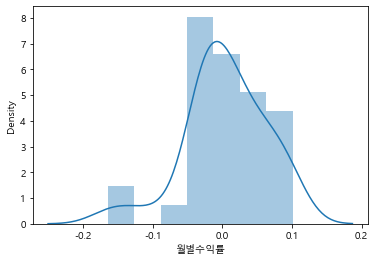

In [106]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(fund_cd_df["월별수익률"])

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.16477158, -0.13122372, -0.08687433, -0.03909467, -0.03762862,
         -0.03482174, -0.03358566, -0.02819842, -0.02705681, -0.02486849,
         -0.02280094, -0.02203734, -0.02118577, -0.02074602, -0.01216047,
         -0.01016321,  0.00291769,  0.00388712,  0.00390048,  0.00443332,
          0.00781421,  0.01466447,  0.01780747,  0.02572999,  0.02816641,
          0.02974933,  0.04128643,  0.04950547,  0.05835866,  0.06173595,
          0.06

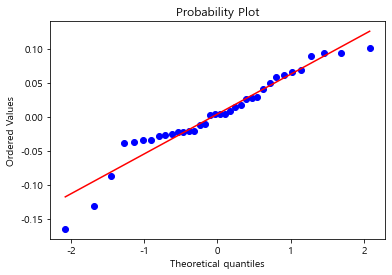

In [107]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(fund_cd_df["월별수익률"], plot=plt)

In [108]:
3년 수익률 → 2019.7.1 펀드종가, 2022.6.31 펀드 종가

3년 CD 금리 → 3년 CD의 평균

3년 표준편차 → [”월별수익률”<0].std(ddof=0)

SyntaxError: invalid decimal literal (2564658185.py, line 1)

In [49]:
fund_cd_df.head(2)

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190730,888.56,2038.68,201907,-0.033586,0.005926,-0.039197,0.009647,0.0168
1,20190830,868.3,1967.79,201908,-0.022801,0.007033,-0.034772,0.011908,0.0149


In [37]:
# 초과수익률 계산
excess_return = fund_cd_df["월별수익률"]-fund_cd_df["CD금리"]
kospi_excess_return = fund_cd_df["KOSPI 월별수익률"]-fund_cd_df["CD금리"]
return_std = fund_cd_df["월별 표준편차"]
kospi_return_std = fund_cd_df["KOSPI 월별 표준편차"]

In [38]:
sortino_df = pd.DataFrame()
sortino_df["기준월"] = fund_cd_df["기준월"]
sortino_df["종가"] = fund_cd_df["기준가격"]
sortino_df["KOSPI 종가"] = fund_cd_df["KOSPI"]
sortino_df["초과수익률"] = excess_return
sortino_df["월별 표준편차"] = return_std
sortino_df["KOSPI 초과수익률"] = kospi_excess_return
sortino_df["KOSPI 월별 표준편차"] = kospi_return_std
sortino_df.head()

,기준월,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차
0,201907,888.56,2038.68,-0.050386,0.005926,-0.055997,0.009647
1,201908,868.3,1967.79,-0.037701,0.007033,-0.049672,0.011908
2,201909,925.39,2063.05,0.050349,0.005787,0.033010,0.003380
3,201910,928.09,2083.48,-0.011682,0.004924,-0.004697,0.006137
4,201911,931.71,2089.8,-0.011300,0.003749,-0.012167,0.007300


In [39]:
sortino_df

,기준월,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차
0,201907,888.56,2038.68,-0.050386,0.005926,-0.055997,0.009647
1,201908,868.3,1967.79,-0.037701,0.007033,-0.049672,0.011908
2,201909,925.39,2063.05,0.050349,0.005787,0.033010,0.003380
3,201910,928.09,2083.48,-0.011682,0.004924,-0.004697,0.006137
4,201911,931.71,2089.8,-0.011300,0.003749,-0.012167,0.007300
5,201912,989.23,2197.67,0.046436,0.003778,0.036317,0.005143
6,202001,967.43,2131.08,-0.036737,0.009754,-0.045000,0.013695
7,202002,940.15,1987.01,-0.042398,0.009020,-0.081804,0.016374
8,202003,785.24,1717.73,-0.177072,0.016210,-0.147820,0.048106
9,202004,859.29,1922.77,0.083302,0.009231,0.108367,0.017137


In [43]:
sortino_df["소르티노지수"] = ""
sortino_df["소르티노지수"] = sortino_df["초과수익률"]/sortino_df["월별 표준편차"]

In [44]:
sortino_df["KOSPI 소르티노지수"] = ""
sortino_df["KOSPI 소르티노지수"] = sortino_df["KOSPI 초과수익률"]/sortino_df["KOSPI 월별 표준편차"]

In [46]:
sortino_df["CD금리"] = fund_cd_df["CD금리"]

In [48]:
sortino_df.set_index(["기준월"], inplace=True)

,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차,소르티노지수,KOSPI 소르티노지수,CD금리
기준월,,,,,,,,,
201907,888.56,2038.68,-0.050386,0.005926,-0.055997,0.009647,-8.502690,-5.804339,0.0168
201908,868.3,1967.79,-0.037701,0.007033,-0.049672,0.011908,-5.360338,-4.171418,0.0149
201909,925.39,2063.05,0.050349,0.005787,0.033010,0.003380,8.700313,9.766454,0.0154
201910,928.09,2083.48,-0.011682,0.004924,-0.004697,0.006137,-2.372763,-0.765363,0.0146
201911,931.71,2089.8,-0.011300,0.003749,-0.012167,0.007300,-3.014285,-1.666622,0.0152


In [50]:
sortino_df

,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차,소르티노지수,KOSPI 소르티노지수,CD금리
기준월,,,,,,,,,
201907,888.56,2038.68,-0.050386,0.005926,-0.055997,0.009647,-8.502690,-5.804339,0.0168
201908,868.3,1967.79,-0.037701,0.007033,-0.049672,0.011908,-5.360338,-4.171418,0.0149
201909,925.39,2063.05,0.050349,0.005787,0.033010,0.003380,8.700313,9.766454,0.0154
201910,928.09,2083.48,-0.011682,0.004924,-0.004697,0.006137,-2.372763,-0.765363,0.0146
201911,931.71,2089.8,-0.011300,0.003749,-0.012167,0.007300,-3.014285,-1.666622,0.0152
201912,989.23,2197.67,0.046436,0.003778,0.036317,0.005143,12.291487,7.061083,0.0153
202001,967.43,2131.08,-0.036737,0.009754,-0.045000,0.013695,-3.766338,-3.286005,0.0147
202002,940.15,1987.01,-0.042398,0.009020,-0.081804,0.016374,-4.700499,-4.995985,0.0142
202003,785.24,1717.73,-0.177072,0.016210,-0.147820,0.048106,-10.923589,-3.072775,0.0123
